A program that reads and processes images for a Support Vector Machine (SVM) to classify images as good, blacked-out, saturated, or blurry.

In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import sys
sys.path.insert(0, 'C:/Users/micha/github/uav-image-analysis/scripts/')
import fit_models

import pickle

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df_train = pd.read_csv('/Users/micha/ea-applications/data/test-images2.csv')

paths = '/Users/micha/ea-applications/data/training-test-images/Thermal/mytest2/*MEDIA/'

train_images, image_list = fit_models.read_images(paths)

y = np.array(df_train['Label'])

y = df_train['Label'].values

X_train, X_test, y_train, y_test = train_test_split(train_images, y, random_state=42, test_size=0.4)

print(df_train.head())
print(X_train.shape)
print(y_train)

(324, 327680)
      MEDIA Image_Name  Label
0  100MEDIA   DJI_0001      2
1  100MEDIA   DJI_0002      2
2  100MEDIA   DJI_0003      2
3  100MEDIA   DJI_0004      2
4  100MEDIA   DJI_0005      2
(194, 327680)
[0 0 0 0 0 0 0 3 3 0 0 0 0 3 1 0 0 0 3 3 0 0 0 0 0 3 2 2 0 0 0 1 2 0 0 1 0
 0 0 0 0 0 0 0 0 0 3 0 3 0 3 3 0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 0 2 0 0 2 0 0
 1 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 1 0 0 0 0 0 2 0 2 0 0 2 2 0 0
 1 0 3 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 0 1
 2 2 0 0 0 0 0 0 0 0 1 3 2 0 0 0 0 3 1 0 0 0 0 0 2 0 0 0 0 2 0 2 0 0 0 0 0
 0 0 1 0 0 0 0 2 0]


In [3]:
# Run svm model
model = svm.SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
np.set_printoptions(precision=2)
print(classification_report(y_test,y_pred))
accuracy = accuracy_score(y_test,y_pred)



             precision    recall  f1-score   support

          0       0.75      1.00      0.85        97
          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        11
          3       0.00      0.00      0.00        18

avg / total       0.56      0.75      0.64       130



C:\Users\micha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [5]:
print(confusion_matrix(y_test, y_pred))

[[97  0  0  0]
 [ 4  0  0  0]
 [11  0  0  0]
 [18  0  0  0]]


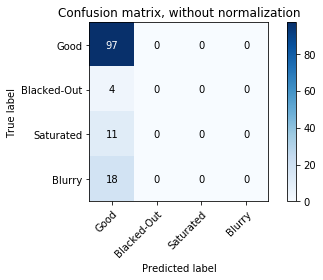

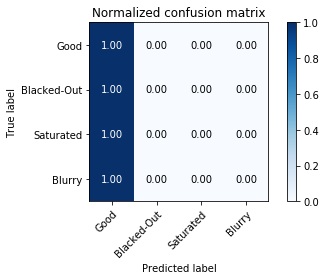

In [6]:
np.set_printoptions(precision=2)
class_labels=['Good', 'Blacked-Out', 'Saturated', 'Blurry']
# Plot non-normalized confusion matrix
fit_models.plot_confusion_matrix(y_test, y_pred, classes=class_labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
fit_models.plot_confusion_matrix(y_test, y_pred, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [7]:
# save the model to disk
#filename = 'finalized_model.sav'
#pickle.dump(model, open(filename, 'wb'))